# MOwNiT – Układy równań liniowych - metody bezpośrednie

__Przygotował:__
__Szymon Budziak__

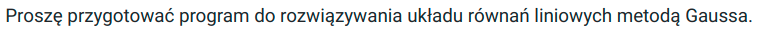

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def gaussian_elimination(A, B):
    n = np.shape(A)[0]
    C = np.hstack([A, B.reshape((n, 1))])

    for i in range(n):
        for j in range(i + 1, n):
            ratio = C[j][i] / C[i][i]
            C[j] = C[j] - ratio * C[i]

    X = C[:, n]
    X[n - 1] /= C[n - 1][n - 1]
    for i in range(n - 2, -1, -1):
        X[i] -= np.sum(C[i][i + 1:n] * X[i + 1:n])
        X[i] /= C[i][i]
    return X

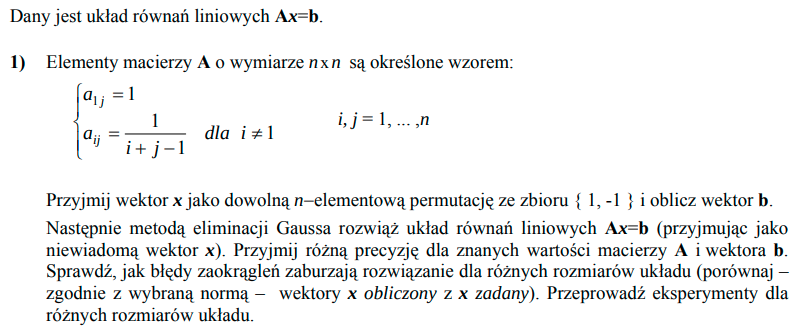

In [3]:
def exercise_1(n):
    result = []
    for n in range(3, n):
        for float_type in [np.float32, np.float64, np.float128]:
            A = np.array([[1 / (i + j - 1) if i != 1 else 1 for j in range(1, n + 1)] for i in range(1, n + 1)]).astype(float_type)
            X_vec = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
            B = A @ X_vec
            X = gaussian_elimination(A, B)
            norm = np.linalg.norm(X_vec - X)
            result += [n, float_type, norm, A, B, X_vec, X]
    df = pd.DataFrame(data={"n": result[::7],
                            "float type": result[1::7],
                            "norm": result[2::7],
                            "A": result[3::7],
                            "B": result[4::7],
                            "X given": result[5::7],
                            "X": result[6::7]})
    return df

In [4]:
df_1 = exercise_1(80)
df_1

,n,float type,norm,A,B,X given,X
0,3,<class 'numpy.float32'>,0.000000e+00,"[[1.0, 1.0, 1.0], [0.5, 0.33333334, 0.25], [0....","[1.0, 0.4166666567325592, 0.28333334624767303]","[1, -1, 1]","[1.0, -1.0, 1.0]"
1,3,<class 'numpy.float64'>,0.000000e+00,"[[1.0, 1.0, 1.0], [0.5, 0.3333333333333333, 0....","[1.0, 0.4166666666666667, 0.2833333333333333]","[1, -1, 1]","[1.0, -1.0, 1.0]"
2,3,<class 'numpy.float128'>,0.000000e+00,"[[1.0, 1.0, 1.0], [0.5, 0.33333333333333331483...","[1.0, 0.41666666666666668517, 0.28333333333333...","[1, -1, 1]","[1.0, -1.0, 1.0]"
3,4,<class 'numpy.float32'>,6.646519e-15,"[[1.0, 1.0, 1.0, 1.0], [0.5, 0.33333334, 0.25,...","[0.0, 0.21666665375232697, 0.11666667461395264...","[1, -1, 1, -1]","[1.0, -1.0000000000000018, 1.0000000000000053,..."
4,4,<class 'numpy.float64'>,3.018715e-13,"[[1.0, 1.0, 1.0, 1.0], [0.5, 0.333333333333333...","[0.0, 0.21666666666666667, 0.1166666666666667,...","[1, -1, 1, -1]","[0.999999999999975, -0.9999999999998551, 0.999..."
...,...,...,...,...,...,...,...
226,78,<class 'numpy.float64'>,2.038574e+02,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 0.30056375999085916, 0.18693624000914066...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0000105437028224, -1.0009177837449919, 1.02..."
227,78,<class 'numpy.float128'>,1.328513e-01,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 0.30056375999085946718, 0.18693624000914...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[0.9999999954599235181, -0.9999996272552086988..."
228,79,<class 'numpy.float32'>,1.374923e-07,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.0, 0.31306375563144684, 0.19928192347288132...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0000000000237352, -1.0000000005523049, 1.00..."
229,79,<class 'numpy.float64'>,6.787554e+02,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[1.0, 0.31306375999085917, 0.19928191902148634...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[0.9999666634611017, -0.9973509534528406, 0.93..."


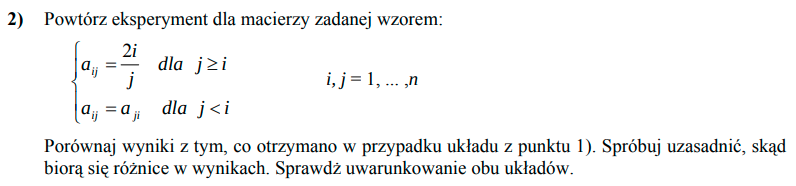

In [5]:
def exercise_2(n):
    result = []
    for n in range(3, n):
        for float_type in [np.float32, np.float64, np.float128]:
            A = np.zeros((n, n)).astype(float_type)
            for i in range(1, n + 1):
                for j in range(1, n + 1):
                    if j >= i:
                        A[i - 1][j - 1] = 2 * i / j
                    else:
                        A[i - 1][j - 1] = A[j - 1][i - 1]
            X_vec = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
            B = A @ X_vec
            X = gaussian_elimination(A, B)
            norm = np.linalg.norm(X_vec - X)
            result += [n, float_type, norm, A, B, X_vec, X]
    df = pd.DataFrame(data={"n": result[::7],
                            "float type": result[1::7],
                            "norm": result[2::7],
                            "A": result[3::7],
                            "B": result[4::7],
                            "X given": result[5::7],
                            "X": result[6::7]})
    return df

In [6]:
df_2 = exercise_2(80)
df_2

,n,float type,norm,A,B,X given,X
0,3,<class 'numpy.float32'>,0.000000e+00,"[[2.0, 1.0, 0.6666667], [1.0, 2.0, 1.3333334],...","[1.6666666865348816, 0.3333333730697632, 1.333...","[1, -1, 1]","[1.0, -1.0, 1.0]"
1,3,<class 'numpy.float64'>,3.140185e-16,"[[2.0, 1.0, 0.6666666666666666], [1.0, 2.0, 1....","[1.6666666666666665, 0.33333333333333326, 1.33...","[1, -1, 1]","[1.0, -1.0000000000000002, 1.0000000000000002]"
2,3,<class 'numpy.float128'>,1.212175e-19,"[[2.0, 1.0, 0.66666666666666662966], [1.0, 2.0...","[1.6666666666666666297, 0.33333333333333325932...","[1, -1, 1]","[1.0, -0.99999999999999999995, 0.9999999999999..."
3,4,<class 'numpy.float32'>,0.000000e+00,"[[2.0, 1.0, 0.6666667, 0.5], [1.0, 2.0, 1.3333...","[1.1666666865348816, -0.6666666269302368, -0.1...","[1, -1, 1, -1]","[1.0, -1.0, 1.0, -1.0]"
4,4,<class 'numpy.float64'>,2.482534e-16,"[[2.0, 1.0, 0.6666666666666666, 0.5], [1.0, 2....","[1.1666666666666665, -0.666666666666667, -0.16...","[1, -1, 1, -1]","[1.0, -1.0000000000000002, 1.0, -0.99999999999..."
...,...,...,...,...,...,...,...
226,78,<class 'numpy.float64'>,1.966815e-12,"[[2.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.33...","[1.37355602432208, -0.2528879513558404, 0.4540...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0, -0.9999999999999987, 1.000000000000001, ..."
227,78,<class 'numpy.float128'>,2.814300e-16,"[[2.0, 1.0, 0.66666666666666662966, 0.5, 0.400...","[1.3735560243220785344, -0.2528879513558429312...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0, -1.0, 0.9999999999999999999, -0.99999999..."
228,79,<class 'numpy.float32'>,4.225399e-13,"[[2.0, 1.0, 0.6666667, 0.5, 0.4, 0.33333334, 0...","[1.3988724891096354, -0.2022550217807293, 0.52...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0, -1.0, 0.9999999999999992, -0.99999999999..."
229,79,<class 'numpy.float64'>,1.962885e-12,"[[2.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.33...","[1.3988724800182823, -0.20225503996343533, 0.5...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[0.9999999999999997, -0.9999999999999979, 1.00..."


In [7]:
def compare(df_1, df_2):
    df = pd.DataFrame(data={"n": df_1["n"],
                            "float type": df_1["float type"],
                            "ex 1 norm": df_1["norm"],
                            "ex 2 norm": df_2["norm"],
                            "ex 1 X given": df_2["X given"],
                            "ex 2 X given": df_2["X given"],
                            "ex 1 X": df_1["X"],
                            "ex 2 X": df_2["X"]})
    return df

In [8]:
compare_df = compare(df_1, df_2)
compare_df

,n,float type,ex 1 norm,ex 2 norm,ex 1 X given,ex 2 X given,ex 1 X,ex 2 X
0,3,<class 'numpy.float32'>,0.000000e+00,0.000000e+00,"[1, -1, 1]","[1, -1, 1]","[1.0, -1.0, 1.0]","[1.0, -1.0, 1.0]"
1,3,<class 'numpy.float64'>,0.000000e+00,3.140185e-16,"[1, -1, 1]","[1, -1, 1]","[1.0, -1.0, 1.0]","[1.0, -1.0000000000000002, 1.0000000000000002]"
2,3,<class 'numpy.float128'>,0.000000e+00,1.212175e-19,"[1, -1, 1]","[1, -1, 1]","[1.0, -1.0, 1.0]","[1.0, -0.99999999999999999995, 0.9999999999999..."
3,4,<class 'numpy.float32'>,6.646519e-15,0.000000e+00,"[1, -1, 1, -1]","[1, -1, 1, -1]","[1.0, -1.0000000000000018, 1.0000000000000053,...","[1.0, -1.0, 1.0, -1.0]"
4,4,<class 'numpy.float64'>,3.018715e-13,2.482534e-16,"[1, -1, 1, -1]","[1, -1, 1, -1]","[0.999999999999975, -0.9999999999998551, 0.999...","[1.0, -1.0000000000000002, 1.0, -0.99999999999..."
...,...,...,...,...,...,...,...,...
226,78,<class 'numpy.float64'>,2.038574e+02,1.966815e-12,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0000105437028224, -1.0009177837449919, 1.02...","[1.0, -0.9999999999999987, 1.000000000000001, ..."
227,78,<class 'numpy.float128'>,1.328513e-01,2.814300e-16,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[0.9999999954599235181, -0.9999996272552086988...","[1.0, -1.0, 0.9999999999999999999, -0.99999999..."
228,79,<class 'numpy.float32'>,1.374923e-07,4.225399e-13,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0000000000237352, -1.0000000005523049, 1.00...","[1.0, -1.0, 0.9999999999999992, -0.99999999999..."
229,79,<class 'numpy.float64'>,6.787554e+02,1.962885e-12,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[0.9999666634611017, -0.9973509534528406, 0.93...","[0.9999999999999997, -0.9999999999999979, 1.00..."


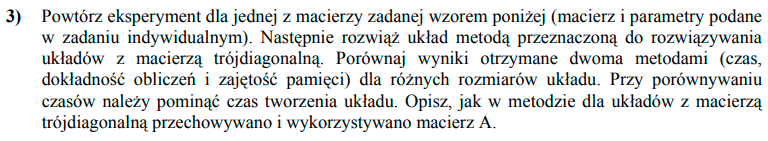

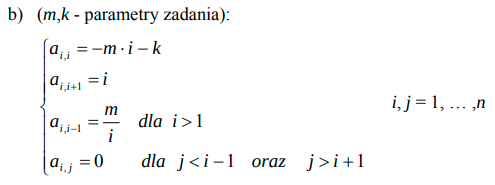

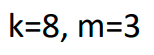

In [9]:
from time import perf_counter

In [10]:
def thomas_algorithm(A, B):
    n = np.shape(A)[0]
    C = np.zeros(n)
    C[0] = A[0][0]

    X = np.zeros(n)
    X[0] = B[0]

    for i in range(1, n):
        ratio = A[i][i - 1] / C[i - 1]
        C[i] = A[i][i] - ratio * A[i - 1][i]
        X[i] = B[i] - ratio * X[i - 1]

    X[n - 1] = X[n - 1] / C[n - 1]
    for i in range(n - 2, -1, -1):
        X[i] = (X[i] - A[i][i + 1] * X[i + 1]) / C[i]
    return X

In [11]:
def exercise_3(n, k, m):
    result = []
    for n in range(3, n):
        A = np.zeros((n, n))
        for i in range(1, n + 1):
            for j in range(1, n + 1):
                if i == j:
                    A[i - 1][j - 1] = -m * i - k
                elif j == i + 1:
                    A[i - 1][j - 1] = i
                elif i > j == i - 1:
                    A[i - 1][j - 1] = m / i
        X_vec = np.array([1 if i % 2 == 0 else -1 for i in range(n)])
        B = A @ X_vec
        gaussian_start = perf_counter()
        X_gaussian = gaussian_elimination(A, B)
        gaussian_end = perf_counter()
        gaussian_time = gaussian_end - gaussian_start
        norm_gaussian = np.linalg.norm(X_vec - X_gaussian)

        thomas_start = perf_counter()
        X_thomas = thomas_algorithm(A, B)
        thomas_end = perf_counter()
        thomas_time = thomas_end - thomas_start
        norm_thomas = np.linalg.norm(X_vec - X_thomas)
        result += [n, X_vec, X_gaussian, norm_gaussian, gaussian_time, X_thomas, norm_thomas, thomas_time]
    df = pd.DataFrame(data={"n": result[::8],
                            "given X": result[1::8],
                            "gaussian X": result[2::8],
                            "gaussian norm": result[3::8],
                            "gaussian time": result[4::8],
                            "thomas X": result[5::8],
                            "thomas norm": result[6::8],
                            "thomas time": result[7::8]})
    return df

In [12]:
df_3 = exercise_3(80, 8, 3)
df_3

,n,given X,gaussian X,gaussian norm,gaussian time,thomas X,thomas norm,thomas time
0,3,"[1, -1, 1]","[1.0, -1.0, 1.0000000000000002]",2.220446e-16,0.000130,"[1.0, -1.0, 1.0000000000000002]",2.220446e-16,0.000026
1,4,"[1, -1, 1, -1]","[1.0, -1.0, 1.0000000000000002, -1.0]",2.220446e-16,0.000066,"[1.0, -1.0, 1.0000000000000002, -1.0]",2.220446e-16,0.000013
2,5,"[1, -1, 1, -1, 1]","[1.0, -1.0, 1.0000000000000002, -1.0, 1.0]",2.220446e-16,0.000080,"[1.0, -1.0, 1.0000000000000002, -1.0, 1.0]",2.220446e-16,0.000015
3,6,"[1, -1, 1, -1, 1, -1]","[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1.0]",2.220446e-16,0.000100,"[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1.0]",2.220446e-16,0.000016
4,7,"[1, -1, 1, -1, 1, -1, 1]","[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",2.482534e-16,0.000128,"[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",2.482534e-16,0.000018
...,...,...,...,...,...,...,...,...
72,75,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.009189,"[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.000139
73,76,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.009874,"[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.000198
74,77,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.008781,"[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.000196
75,78,"[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, ...","[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.010364,"[1.0, -1.0, 1.0000000000000002, -1.0, 1.0, -1....",1.070660e-15,0.000144
